In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prathmeshzade/hindi-ocr-synthetic-line-image-text-pair")

print("Path to dataset files:", path)

100%|██████████| 735M/735M [00:04<00:00, 169MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1


In [2]:
import os
from PIL import Image
import kagglehub
from IPython.display import display



# Download the dataset
path = kagglehub.dataset_download("prathmeshzade/hindi-ocr-synthetic-line-image-text-pair")
print("Path to dataset files:", path)

# Function to load and preprocess images
def load_and_preprocess_images(dataset_path, num_samples=5):
    images = []
    file_paths = []

    # Iterate through dataset folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                file_paths.append(file_path)

    # Sort files for consistent ordering (optional)
    file_paths.sort()

    # Load and preprocess images
    for i, file_path in enumerate(file_paths[:num_samples]):
        print(f"Loading and preprocessing {file_path}...")
        try:
            # Open the image
            image = Image.open(file_path)

            # Example preprocessing: convert to grayscale
            preprocessed_image = image.convert("L")

            # Store the processed image
            images.append(preprocessed_image)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return images, file_paths[:num_samples]

# Load and preprocess images (first 5 samples)
images, file_paths = load_and_preprocess_images(path, num_samples=5)

# Display first 5 processed images and their file paths
for i, (img, fp) in enumerate(zip(images, file_paths)):
    print(f"Image {i+1}: Path = {fp}")
    img.show()  # Display the image (optional, removes need for GUI if not needed)


Path to dataset files: /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1
Loading and preprocessing /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/1.png...
Loading and preprocessing /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/2.png...
Loading and preprocessing /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/3.png...
Loading and preprocessing /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/4.png...
Loading and preprocessing /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/5.png...
Image 1: Path = /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versio

Image 1: Path = /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/1.png


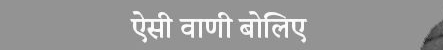

Image 2: Path = /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/2.png


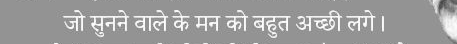

Image 3: Path = /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/3.png


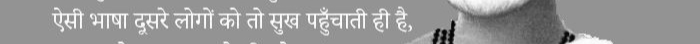

Image 4: Path = /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/4.png


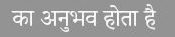

Image 5: Path = /root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/TestSamples/5.png


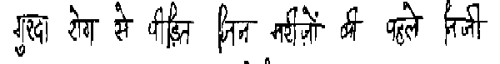

In [3]:
for i, (img, fp) in enumerate(zip(images, file_paths)):
    print(f"Image {i+1}: Path = {fp}")
    display(img)

In [4]:
pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 24.5 MB/s eta 0:00:00


In [5]:
import easyocr
import os
import pandas as pd





In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import easyocr

# Initialize the EasyOCR reader for Hindi
reader = easyocr.Reader(['hi'], gpu=False)  # 'hi' is for Hindi

# Define the path to your dataset folder containing preprocessed images
dataset_folder = '/root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/output_images/'

# Get a list of all image files in the dataset folder
image_files = [
    os.path.join(dataset_folder, filename)
    for filename in os.listdir(dataset_folder)
    if filename.endswith(('.jpg', '.png', '.jpeg'))
]

# Randomly sample 800 images from the dataset
random.seed(42)  # Ensure reproducibility
sampled_files = random.sample(image_files, 80)

# Split the sampled dataset into training and testing subsets (80% train, 20% test)
train_files, test_files = train_test_split(sampled_files, test_size=0.2, random_state=42)

# Function to perform OCR on a list of files
def perform_ocr(file_list):
    results = []
    for image_path in file_list:
        filename = os.path.basename(image_path)
        print(f"Processing: {filename}")

        # Perform OCR on the image
        ocr_results = reader.readtext(image_path)

        # Extract the text and confidence for each detected text region
        for (bbox, text, confidence) in ocr_results:
            # Store the result in the list
            results.append({
                'image': filename,
                'text': text,
                'confidence': confidence
            })
    return results

# Perform OCR on the training set
train_results = perform_ocr(train_files)

# Perform OCR on the testing set
test_results = perform_ocr(test_files)

# Convert the results to DataFrames
train_df = pd.DataFrame(train_results)
test_df = pd.DataFrame(test_results)

# Optionally, save the results to CSV files
train_df.to_csv('hindi_ocr_train_results.csv', index=False)
test_df.to_csv('hindi_ocr_test_results.csv', index=False)

# Print the first 5 rows of the training results
print("Training Data Sample:")
print(train_df.head())

# Print the first 5 rows of the testing results
print("Testing Data Sample:")
print(test_df.head())


Processing: 45608.png
Processing: 53540.png
Processing: 5490.png
Processing: 1125.png
Processing: 16948.png
Processing: 50440.png
Processing: 54094.png
Processing: 48503.png
Processing: 20078.png
Processing: 74833.png
Processing: 11207.png
Processing: 32915.png
Processing: 70221.png
Processing: 75733.png
Processing: 12937.png
Processing: 35428.png
Processing: 4980.png
Processing: 67257.png
Processing: 65397.png
Processing: 57726.png
Processing: 33667.png
Processing: 40612.png
Processing: 43419.png
Processing: 46357.png
Processing: 35835.png
Processing: 634.png
Processing: 74909.png
Processing: 33176.png
Processing: 47982.png
Processing: 12473.png
Processing: 30837.png
Processing: 32840.png
Processing: 2132.png
Processing: 59511.png
Processing: 51475.png
Processing: 68724.png
Processing: 29735.png
Processing: 48140.png
Processing: 56562.png
Processing: 7389.png
Processing: 56678.png
Processing: 15088.png
Processing: 36640.png
Processing: 77917.png
Processing: 27348.png
Processing: 37397

In [11]:
print(test_df.head())

       image                                               text  confidence
0  72623.png               अमरीका कामबंदीः अब भा नहीं निकली राह    0.443339
1  61154.png     सोशल- पहले धमकाया . फिर सुषमा स्वराज ने की मदद    0.426233
2   9349.png    जिनकी नींद उड़ी रहती है उनका दिमाग़ ठीक नहीं होता    0.637773
3  48242.png                       आसाम चाय की प्याली में तूफ़ान    0.619181
4  37670.png  कोरोना महामारी से पीड़ित लोग हा रहे हैं डिप्रे...    0.366101


In [12]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import easyocr
from difflib import SequenceMatcher

# Initialize the EasyOCR reader for Hindi
reader = easyocr.Reader(['hi'], gpu=False)  # 'hi' is for Hindi

# Define paths
dataset_folder = '/root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/output_images/'
csv_file_path = '/root/.cache/kagglehub/datasets/prathmeshzade/hindi-ocr-synthetic-line-image-text-pair/versions/1/data_80k/data.csv'  # Update this to the path of your CSV file

# Load the ground truth from CSV
data_df = pd.read_csv(csv_file_path)

# Randomly sample 800 entries
random.seed(42)
sampled_data = data_df.sample(n=80, random_state=42)

# Map image file paths to ground truth
sampled_data['image_path'] = sampled_data['image_file'].apply(
    lambda x: os.path.join(dataset_folder, x)
)

# Function to calculate character-level accuracy
def calculate_character_accuracy(predicted, ground_truth):
    correct_chars = sum(1 for p, g in zip(predicted, ground_truth) if p == g)
    total_chars = len(ground_truth)
    return (correct_chars / total_chars) * 100 if total_chars > 0 else 0

# Perform OCR and compute accuracy
results = []

for _, row in sampled_data.iterrows():
    image_path = row['image_path']
    ground_truth_text = row['text']

    # Perform OCR
    ocr_results = reader.readtext(image_path)
    predicted_text = ' '.join([text for (_, text, _) in ocr_results])  # Combine all detected texts

    # Calculate character-level accuracy
    char_accuracy = calculate_character_accuracy(predicted_text, ground_truth_text)

    # Store results
    results.append({
        'image_file': row['image_file'],
        'ground_truth': ground_truth_text,
        'predicted_text': predicted_text,
        'character_accuracy': char_accuracy,
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('ocr_accuracy_results.csv', index=False)

# Print summary
print("Average Character Accuracy:", results_df['character_accuracy'].mean())
print("Sample Results:")
print(results_df.head())


Average Character Accuracy: 55.55643082563993
Sample Results:
  image_file                                ground_truth  \
0  47045.png       'सुकून से मरना हो तो केरल पहुंच जाइए'   
1  44296.png     'दोषियों को सौंपने की माँग पर कायम हैं'   
2  74784.png        शरीफ़, राजपक्षे और करज़ई भारत पहुँचे   
3  70976.png                 ब्रिटेन में 'सुडोकू' का नशा   
4  46646.png  80 फ़ीसदी गौरक्षक गोरखधंधे में लिप्त: मोदी   

                             predicted_text  character_accuracy  
0      सुकून से मरना हो तो केरल पहुंच जाइए'            0.000000  
1   'दोषियों को सौंपने की माँग पर कायम हैं'          100.000000  
2          शरीफ़ राजपक्ष और करज़ई भारत पहुँच           13.888889  
3               ब्रिटेन में 'सुडोकू' का नशा          100.000000  
4  ८० फ़ीसदी गौरक्षक गोरखधंध में लिप्तः मोदी            2.380952  
